<a href="https://colab.research.google.com/github/hernandemonteiro/data_science_do_zero/blob/main/Introdu%C3%A7%C3%A3o_a_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
!pip install googletrans==4.0.0-rc1

from googletrans import Translator

def translate_english_to_portuguese(text):
    translator = Translator()
    translation = translator.translate(text, src='en', dest='pt')
    return translation.text

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=766903849580cf6c11b591b03f33e913971c46e1ee21ec47904bcd2adb93f910
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

# **Conhecendo nossos dados**

In [3]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv", sep=",")
print(notas.shape)
notas.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas["nota"].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [6]:
notas.tail(3)

,usuarioId,filmeId,nota,momento
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


## **Filme mais citado**

Qual o titulo do filme que mais recebeu avaliações?

In [7]:
filme_mais_citado = notas["filmeId"].mode()[0]
print(f"Filme mais citado foi o de id: {filme_mais_citado}")

Filme mais citado foi o de id: 356


In [8]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv", sep=",")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
filme = filmes.query(f"filmeId == {filme_mais_citado}")
titulo_mais_avaliado = filme["titulo"].array[0]
genero_mais_avaliado = filme["generos"].array[0]
print(f"O titulo do filme mais avaliado é: {titulo_mais_avaliado}")
print(f"Os genêros do filme mais avaliado é: {translate_english_to_portuguese(genero_mais_avaliado)}")

O titulo do filme mais avaliado é: Forrest Gump (1994)
Os genêros do filme mais avaliado é: Comédia | Drama | Romance | Guerra


nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

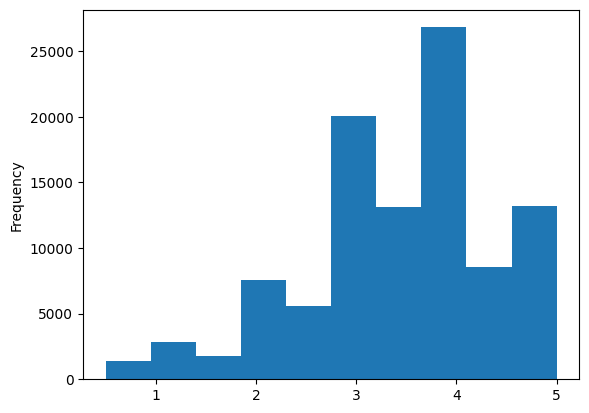

In [10]:
print(notas["nota"].value_counts())
notas["nota"].plot(kind="hist")

In [11]:
notas["nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

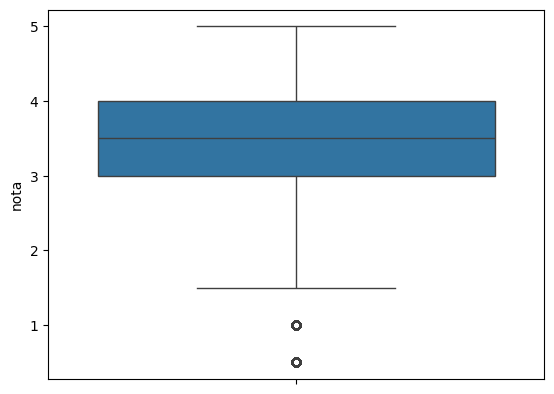

In [12]:
sns.boxplot(notas["nota"])

# **Analisando os dados**

In [13]:
links = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/links.csv", sep=",")
links.columns = ["filmeId", "imdbId", "tmdbId"]
tags = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/tags.csv", sep=",")
tags.columns = ["usuarioId", "filmeId", "tag", "momento_tag"]

dados = pd.merge(notas, filmes, on="filmeId")
dados = pd.merge(dados, links, on="filmeId")
dados = pd.merge(dados, tags[["filmeId", "tag", "momento_tag"]], on="filmeId")

In [14]:
print(dados.shape)
dados.head()

(233213, 10)


,usuarioId,filmeId,nota,momento,titulo,generos,imdbId,tmdbId,tag,momento_tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825


In [15]:
dados.query("filmeId == 1")["nota"].mean()

3.9209302325581397

In [16]:
dados.query("filmeId == 2")["nota"].mean()

3.4318181818181817

In [17]:
medias_por_filme = dados.groupby("filmeId")["nota"].mean()
print(medias_por_filme.shape)
medias_por_filme.head()

(1554,)


filmeId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
7    3.185185
Name: nota, dtype: float64

<Axes: title={'center': 'nota media'}, ylabel='Frequency'>

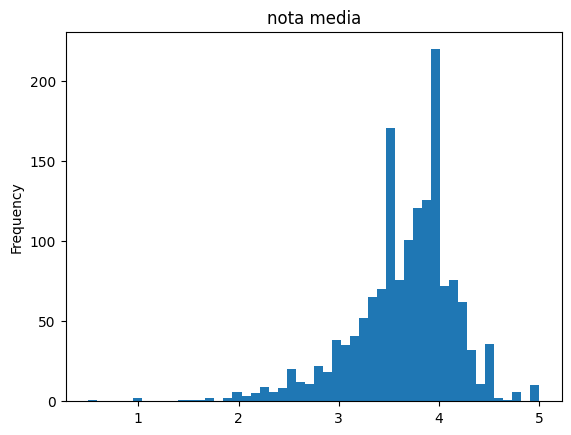

In [18]:
medias_por_filme.plot(kind='hist', bins=50, title='nota media')

In [19]:
cinco_primeiros = filmes["titulo"][5:10]
# usando @ para citar variavel externa
display(dados.query("titulo in @cinco_primeiros").head())
id = 2
display(dados.query("filmeId == @id").head())

,usuarioId,filmeId,nota,momento,titulo,generos,imdbId,tmdbId,tag,momento_tag
147767,6,7,4.0,845554264,Sabrina (1995),Comedy|Romance,114319,11860.0,remake,1137375642
147768,14,7,3.0,835441989,Sabrina (1995),Comedy|Romance,114319,11860.0,remake,1137375642
147769,19,7,2.0,965706657,Sabrina (1995),Comedy|Romance,114319,11860.0,remake,1137375642
147770,31,7,4.0,850466642,Sabrina (1995),Comedy|Romance,114319,11860.0,remake,1137375642
147771,32,7,4.0,856736173,Sabrina (1995),Comedy|Romance,114319,11860.0,remake,1137375642


,usuarioId,filmeId,nota,momento,titulo,generos,imdbId,tmdbId,tag,momento_tag
147229,6,2,4.0,845553522,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,fantasy,1528843929
147230,6,2,4.0,845553522,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,magic board game,1528843932
147231,6,2,4.0,845553522,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,Robin Williams,1528843907
147232,6,2,4.0,845553522,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,game,1137375552
147233,8,2,4.0,839463806,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,fantasy,1528843929


<Axes: ylabel='nota'>

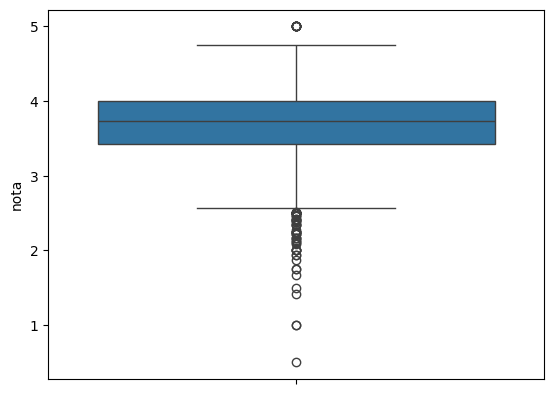

In [20]:
sns.boxplot(medias_por_filme)

In [21]:
medias_por_filme.describe()

count    1554.000000
mean        3.652361
std         0.521367
min         0.500000
25%         3.418098
50%         3.736695
75%         4.000000
max         5.000000
Name: nota, dtype: float64

Text(0.5, 1.0, 'Histograma das médias do filme')

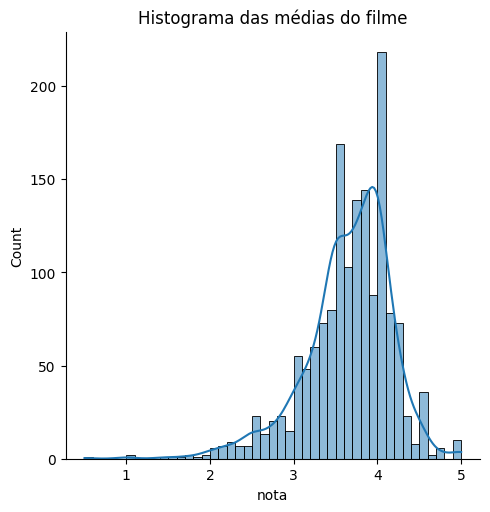

In [22]:
sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias do filme")

# **Entendendo os tipos de variáveis**

In [23]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


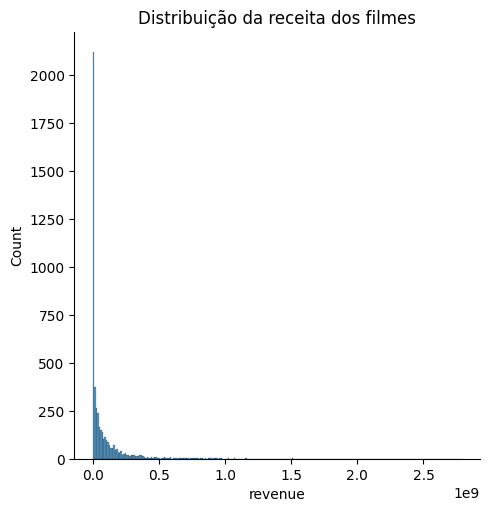

In [24]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

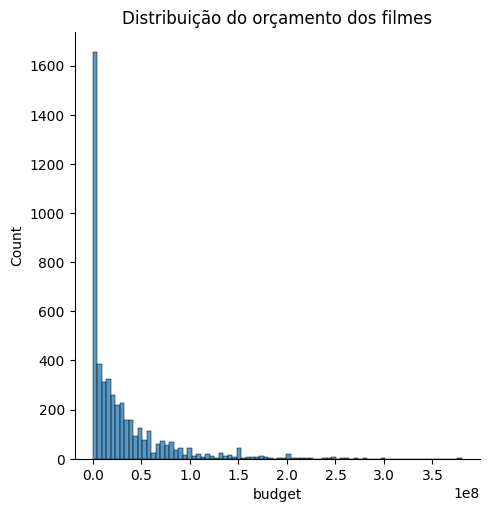

In [25]:
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [26]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [27]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [28]:
com_faturamento = tmdb.query("revenue > 0")

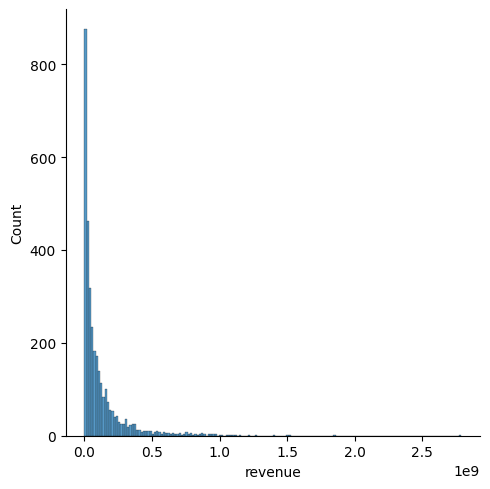

In [29]:
sns.displot(com_faturamento["revenue"])

In [30]:
# print(len(tmdb))
most_commmon_language = tmdb["original_language"].mode()[0]
print(f"Lingua que mais se repetiu: {most_commmon_language}\n")

tmdb["original_language"].value_counts().head(10)

Lingua que mais se repetiu: en



original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
Name: count, dtype: int64

In [31]:
tmdb.query("original_language == 'pt'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2915,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""...",NaN,206563,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 8029...",pt,Trash,"Set in Brazil, three kids who make a discovery...",14.637357,"[{""name"": ""O2 Filmes"", ""id"": 345}, {""name"": ""W...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2014-10-09,0,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,You never know what you might find,Trash,7.1,242
3417,4000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://www.tropadeeliteofilme.com.br/,7347,"[{""id"": 100, ""name"": ""slum""}, {""id"": 796, ""nam...",pt,Tropa de Elite,"In 1997, before the visit of the pope to Rio d...",23.604936,"[{""name"": ""The Weinstein Company"", ""id"": 308},...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2007-10-12,0,115.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,On the streets of Rio only the elite survive,Elite Squad,7.8,504
3797,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,227975,"[{""id"": 74, ""name"": ""germany""}, {""id"": 237, ""n...",pt,Praia do Futuro,Donato fails in his attempt to save a drowning...,2.611364,"[{""name"": ""Cora\u00e7\u00e3o da Selva"", ""id"": ...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2014-05-01,0,106.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,A hero split in half.,Futuro Beach,6.4,31
3818,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,29262,"[{""id"": 1161, ""name"": ""brazil""}, {""id"": 18034,...",pt,Casa de Areia,A woman is taken along with her mother in 1910...,0.389471,[],"[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2005-05-13,0,115.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,The House of Sand,6.7,9
3866,3300000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://cidadededeus.globo.com/,598,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 54...",pt,Cidade de Deus,Cidade de Deus is a shantytown that started du...,44.356711,"[{""name"": ""O2 Filmes"", ""id"": 345}, {""name"": ""V...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2002-02-05,30641770,130.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,"If you run you're dead... if you stay, you're ...",City of God,8.1,1814
3974,2900000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,666,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 1161...",pt,Central do Brasil,"An emotive journey of a former school teacher,...",5.928937,"[{""name"": ""MACT Productions"", ""id"": 393}, {""na...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1998-01-16,5596708,113.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,He was looking for the father he never knew. S...,Central Station,7.6,126
4303,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,310569,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 1161...",pt,Que Horas Ela Volta?,After leaving her daughter Jessica in a small ...,9.683622,"[{""name"": ""Gullane Entretenimento S.A."", ""id"":...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2015-02-08,0,110.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,The Second Mother,7.8,165
4684,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,402515,"[{""id"": 321, ""name"": ""terror""}, {""id"": 8087, ""...",pt,Solitude,After finding an old storage locker filled wit...,0.018716,"[{""name"": ""Gravitas Ventures"", ""id"": 44632}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-10-21,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,American Beast,0.0,0
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mi

In [32]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [33]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [34]:
tmdb["original_language"].value_counts().to_frame()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [35]:
contagem_de_linguas = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_linguas

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [36]:
contagem_de_linguas.columns = ["Lingua Original", "Total"]
contagem_de_linguas

,Lingua Original,Total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


<Axes: xlabel='Lingua Original', ylabel='Total'>

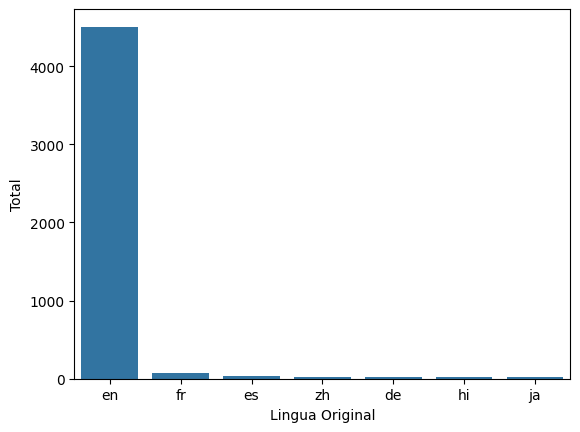

In [37]:
sns.barplot(data=contagem_de_linguas.head(7), x="Lingua Original", y="Total")

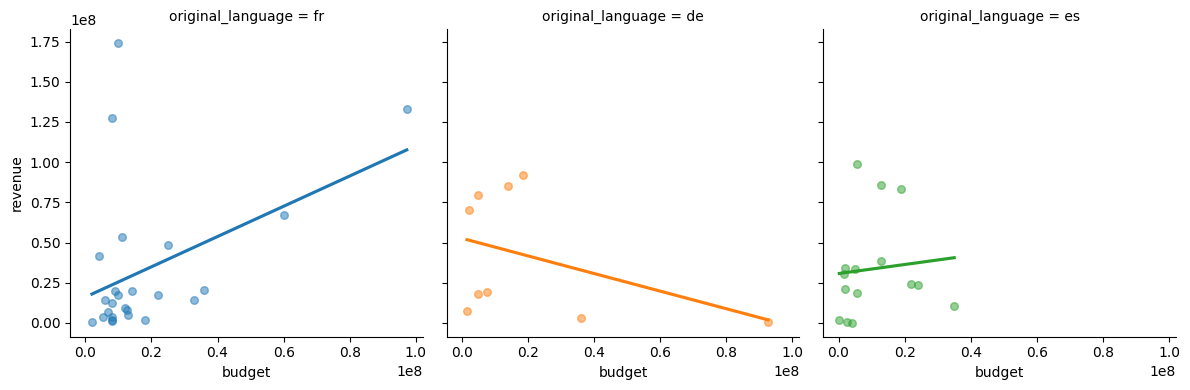

In [38]:
# Filtrando os dados para as colunas desejadas
dados = tmdb[["title", "original_language", "budget", "revenue"]]
linguas = ["fr", "es", "de"]

fr_es_de_com_revenue_e_budget = dados.query("revenue > 0 and budget > 0 and original_language == @linguas")

sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language",
           hue="original_language", ci=None, height=4, scatter_kws={"s": 30, "alpha": 0.5})

In [44]:
notas_toy_story = notas.query("filmeId==1")["nota"]
notas_do_jumanji = notas.query("filmeId==2")["nota"]
media_do_toy_story = notas_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

mediana_do_toy_story = notas_toy_story.median()
mediana_do_jumanji = notas_do_jumanji.median()

print(round(media_do_jumanji, 2), round(media_do_toy_story, 2))
print(round(mediana_do_jumanji, 2), round(mediana_do_toy_story, 2))

3.43 3.92
3.5 4.0


**Minhas anotações**

# Função de custo

meu teste para criação de função de custo

In [40]:
import random

# modelo que eu desenvolvi sem y
# def j(w: list[int]):
#   result = 0
#   n = len(w)
#   for i in range(n):
#     result = result + ((y**w[i]) - (y**w[i]))**2
#   return 1/(2*n)*result

w = [random.randint(0, 1) for _ in range(400000)]

# modelo refatorado com y padrão
def j(w: list[int]):
    result = 0
    n = len(w)
    for i in range(n):
        y = 10
        y_pred = 8

        result += (y ** w[i] - y_pred ** w[i]) ** 2

    J = (1 / (2 * n)) * result
    return J

j(w)

0.9992800000000001